In [13]:
import bagpy
from typing import *
from os.path import join, exists
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
def get_results_from_folder(folder: str) -> Dict[str, Tuple[List[float], List[float]]]:
    utn_path = join(folder, "UTN")
    maryland_path = join(folder, "MARYLAND")
    if not exists(utn_path) or not exists(maryland_path):
        print(f"Skipping {folder} because of not having both maryland and UTN")
        return None
    utn_bag_file = glob(join(utn_path, "*.bag"))[0]
    maryland_bag_file = glob(join(maryland_path, "*.bag"))[0]
    reader_utn = bagpy.bagreader(utn_bag_file)
    reader_maryland = bagpy.bagreader(maryland_bag_file)
    
    def get_explored_df(reader: bagpy.bagreader) -> pd.DataFrame:
        explored_data =  reader.reader.read_messages("/create1/explored")
        amt_of_non_unknown = []
        timestamps = []
        for d in explored_data:
            amt_of_non_unknown.append(d.message.data)
            timestamps.append(d.timestamp.to_sec())
        amt_of_non_unknown = [0.0025 * item for item in amt_of_non_unknown]
        dic = {"timestamp": timestamps, "m_2_explored": amt_of_non_unknown}
        df = pd.DataFrame(dic)
        df["timestamp"] -= dic["timestamp"][0]
        df = df.set_index("timestamp")
        return df
    
    def get_travelled_distance_df(reader: bagpy.bagreader) -> pd.DataFrame:
        travelled_data =  reader.reader.read_messages("/create1/travelled_distance")
        cum_distance = []
        timestamps = []
        for d in travelled_data:
            cum_distance.append(d.message.data)
            timestamps.append(d.timestamp.to_sec())
        dic = {"timestamp": timestamps, "cum_distance": cum_distance}
        df = pd.DataFrame(dic)
        df["timestamp"] -= dic["timestamp"][0]
        df = df.set_index("timestamp")
        return df
    def get_times_and_explores(reader: bagpy.bagreader) -> Tuple[List[float], List[float]]:
        explored_df = get_explored_df(reader)
        travelled_distance_df = get_travelled_distance_df(reader)
        return (explored_df, travelled_distance_df)
    res = {"UTN": get_times_and_explores(reader_utn), "MARYLAND": get_times_and_explores(reader_maryland)}
    return res

[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7/UTN/2022-10-14-04-04-47.bag.ac already exists. Not creating.
[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7/MARYLAND/2022-10-14-04-02-03.bag.ac already exists. Not creating.


In [15]:
def plot_result(res: Dict):
    utn_df=  pd.merge_asof(res["UTN"][0], res["UTN"][1], on="timestamp")
    maryland_df=  pd.merge_asof(res["MARYLAND"][0], res["MARYLAND"][1], on="timestamp")
    utn_df = utn_df.dropna()
    maryland_df = maryland_df.dropna()
    
    plt.plot( utn_df["cum_distance"], utn_df["m_2_explored"], label="UTN")
    plt.plot( maryland_df["cum_distance"], maryland_df["m_2_explored"], label="MARYLAND")
    plt.ylabel("Explored area [m2]")
    plt.xlabel("Distance travelled [m]")
    
    plt.legend()
     

In [16]:
worlds_df = pd.read_pickle("/home/ramiro/.gazebo/worlds_df.pkl")

In [ ]:
res = 

In [21]:
worlds_df.loc["evaluation_2"].world.free_space_polygon.area

1432.8369761215083

In [39]:
res_3 = get_results_from_folder("/home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/evaluation_9")
plot_result(res_3)

[INFO]  Successfully created the data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/evaluation_9/UTN/2022-10-17-05-08-23.bag.ac.


ROSBagException: Bag contains no message

[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_13/UTN/2022-10-16-19-43-07.bag.ac already exists. Not creating.
[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_13/MARYLAND/2022-10-16-19-10-09.bag.ac already exists. Not creating.


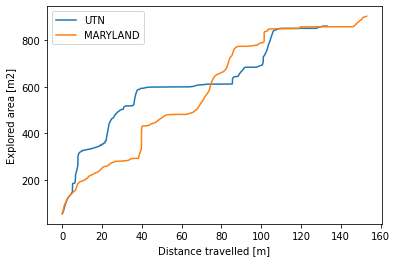

In [ ]:
res_7 = get_results_from_folder("/home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_2")
plot_result(res_7)

In [13]:
res_7 = get_results_from_folder("/home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7")

[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7/UTN/2022-10-14-04-04-47.bag.ac already exists. Not creating.
[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7/MARYLAND/2022-10-14-04-02-03.bag.ac already exists. Not creating.


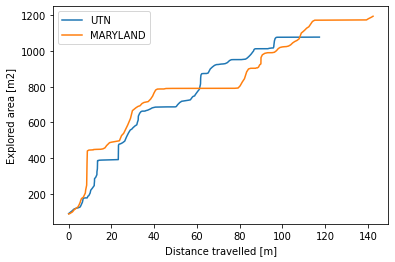

In [39]:
plot_result(res_9)

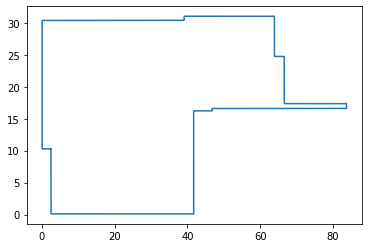

In [25]:
plt.plot(*worlds_df.loc["test_9"].world.free_space_polygon.exterior.xy)

In [24]:
print(f"Area total: {worlds_df.loc['test_9'].free_area}")

Area total: 1593.9369583629668


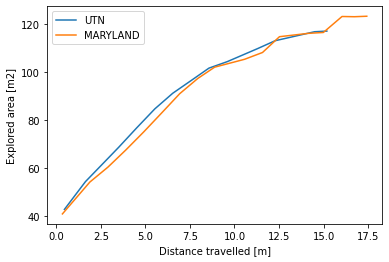

In [14]:
plot_result(res_7)

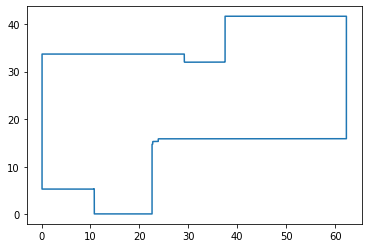

In [33]:
plt.plot(*worlds_df.loc["test_7"].world.free_space_polygon.exterior.xy)

In [27]:
print(f"Area total: {worlds_df.loc['test_7'].free_area}")

Area total: 1588.816181110351


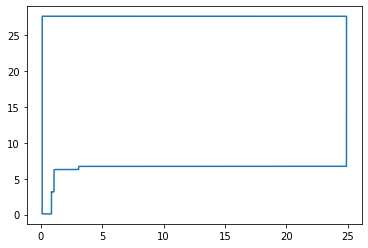

In [31]:
plt.plot(*worlds_df.loc["test_1"].world.free_space_polygon.exterior.xy)